In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

sns.set_style(style = 'white')
plt.style.use('fivethirtyeight')

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.node_asp_interactivity = 'all'

In [3]:
from sklearn.datasets import load_boston


In [4]:
boston = load_boston()

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [8]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
boston_df['MEDV'] = boston.target

In [15]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


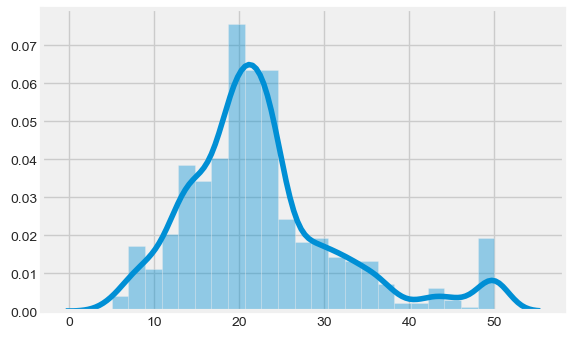

In [20]:
plt.figure(dpi = 100)

sns.distplot(boston.MEDV);

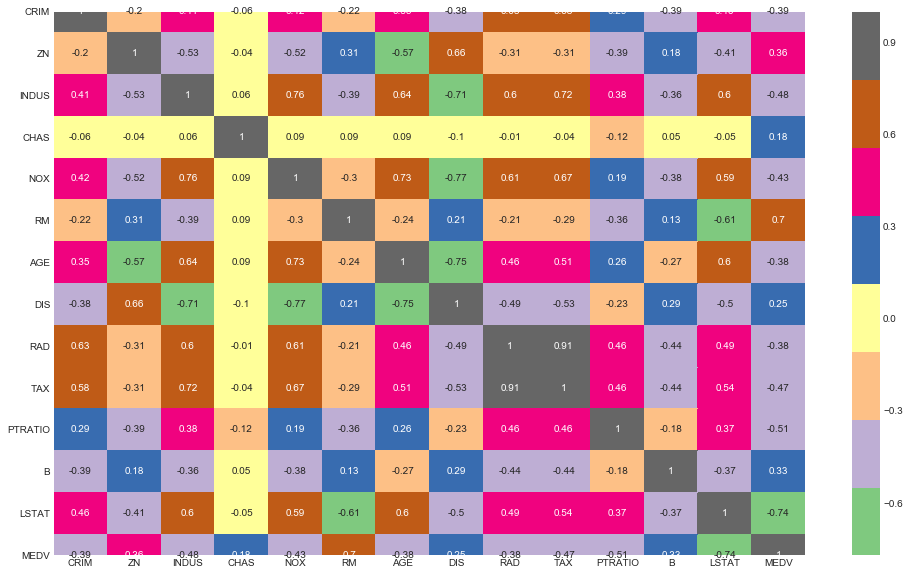

In [33]:
plt.figure(figsize = (15,10))

corr_mat = boston_df.corr().round(2)

sns.heatmap(corr_mat, annot=True, cmap= 'Accent');

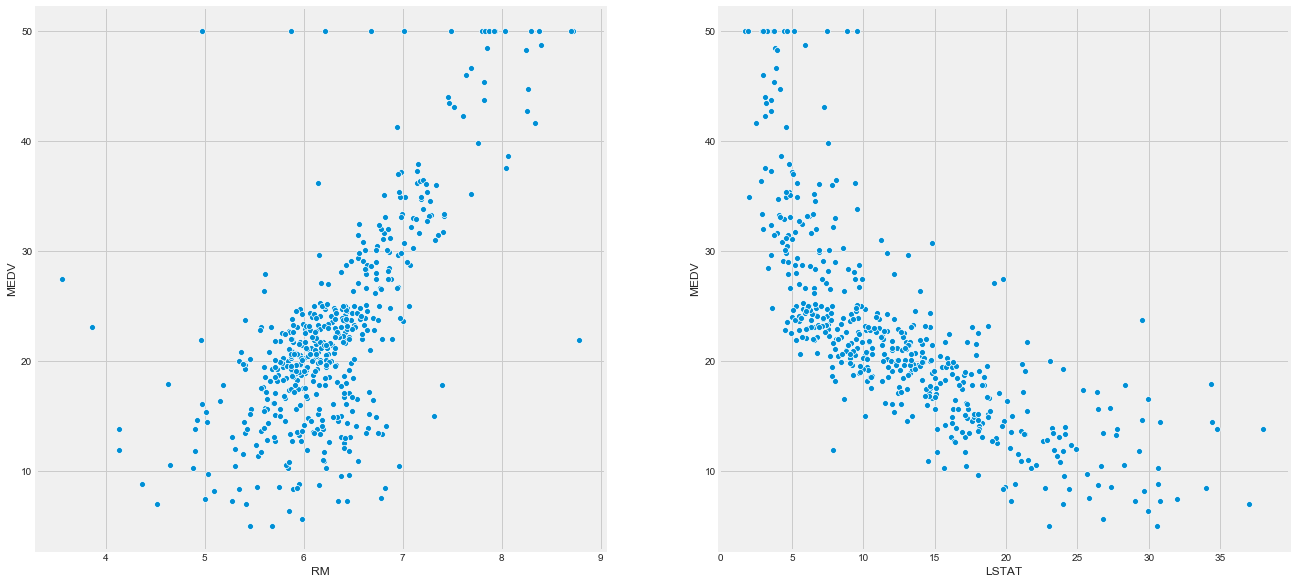

In [36]:
plt.figure(figsize = (20,10))

plt.subplot(121)
sns.scatterplot(boston_df.RM, boston_df.MEDV)

plt.subplot(122)
sns.scatterplot(boston_df.LSTAT, boston_df.MEDV)

In [41]:
X = boston_df[['RM','LSTAT']]
Y = boston_df['MEDV']

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=1)

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
prm = LinearRegression()

In [55]:
prm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
prm.coef_

array([ 4.5389694 , -0.65930795])

In [57]:
prm.intercept_

2.4934145277051734

In [58]:
pred = prm.predict(X_train)

In [59]:
r2_score(Y_train,pred)

0.6251836356449056

In [61]:
np.sqrt(mean_squared_error(Y_train,pred))

5.5025616762333085

In [62]:
tprm = LinearRegression()

In [63]:
tprm.fit(X_test,Y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
tprm.coef_

array([ 6.9650404 , -0.59055096])

In [65]:
tprm.intercept_

-14.45648095232885

In [68]:
Y_pred = tprm.predict(X_test)

In [69]:
r2_score(Y_test,Y_pred)

0.7054667508736636

In [70]:
np.sqrt(mean_squared_error(Y_test,Y_pred))

5.395178599636359

## Polynomial Regression

In [72]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [98]:
def preg(degree, X_train, Y_train, X_test, Y_test):
    X_trans = PolynomialFeatures(degree = degree)
    X_trans_poly = X_trans.fit_transform(X_train)
    X_reg = LinearRegression()
    X_reg.fit(X_trans_poly,Y_train)

    Y_poly_pred = X_reg.predict(X_trans_poly)
    score = r2_score(Y_train,Y_poly_pred)
    rmse = np.sqrt(mean_squared_error(Y_train,Y_poly_pred))
    print("Train Data")
    print("-"*30)
    print("r2_score: ",score)
    print("RMSE value: ",rmse)

    X_trans_t = PolynomialFeatures(degree = 2)
    X_trans_poly_t = X_trans.fit_transform(X_test)
    X_reg = LinearRegression()
    X_reg.fit(X_trans_poly_t,Y_test)

    Y_poly_pred_t = X_reg.predict(X_trans_poly_t)
    score = r2_score(Y_test,Y_poly_pred_t)
    rmse = np.sqrt(mean_squared_error(Y_test,Y_poly_pred_t))
    print("Test Data")
    print("-"*30)
    print("r2_score: ",score)
    print("RMSE value: ",rmse)


In [99]:
preg(1, X_train, Y_train, X_test, Y_test)

Train Data
------------------------------
r2_score:  0.6251836356449056
RMSE value:  5.5025616762333085
Test Data
------------------------------
r2_score:  0.7054667508736637
RMSE value:  5.395178599636358


In [100]:
preg(2, X_train, Y_train, X_test, Y_test)

Train Data
------------------------------
r2_score:  0.7364803609004458
RMSE value:  4.613835865990486
Test Data
------------------------------
r2_score:  0.8369501965497316
RMSE value:  4.014198105209509


In [101]:
preg(3, X_train, Y_train, X_test, Y_test)

Train Data
------------------------------
r2_score:  0.7516888526190901
RMSE value:  4.478718385300251
Test Data
------------------------------
r2_score:  0.8468418894979635
RMSE value:  3.890529043253457


In [102]:
preg(4, X_train, Y_train, X_test, Y_test)

Train Data
------------------------------
r2_score:  0.780546689067282
RMSE value:  4.210432564587832
Test Data
------------------------------
r2_score:  0.8933537083037167
RMSE value:  3.2464711002147424


In [103]:
preg(5, X_train, Y_train, X_test, Y_test)

Train Data
------------------------------
r2_score:  0.8002270854239539
RMSE value:  4.017204588716903
Test Data
------------------------------
r2_score:  0.9089660000964797
RMSE value:  2.999442041959754


In [104]:
preg(6, X_train, Y_train, X_test, Y_test)

Train Data
------------------------------
r2_score:  0.807165974343286
RMSE value:  3.946821461751893
Test Data
------------------------------
r2_score:  0.9222102687821517
RMSE value:  2.772680303152505


In [106]:
preg(7, X_train, Y_train, X_test, Y_test)

Train Data
------------------------------
r2_score:  0.8104809171679224
RMSE value:  3.9127501809677288
Test Data
------------------------------
r2_score:  0.9051598374230724
RMSE value:  3.0615038272015784


In [107]:
preg(8, X_train, Y_train, X_test, Y_test)

Train Data
------------------------------
r2_score:  0.8127927469146001
RMSE value:  3.888812308410208
Test Data
------------------------------
r2_score:  0.9205073695004842
RMSE value:  2.802864455163664
